[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/resize_antialias.ipynb)

# Resize anti-alias

In this tutorial we are going to learn how to resize an image with anti-alias.

## Install Kornia

In [ ]:
%%capture
!pip install kornia

## Prepare the data

Download an example image

In [ ]:
%%capture
!wget https://github.com/kornia/data/raw/main/drslump.jpg

Load the image using OpenCV and plot it

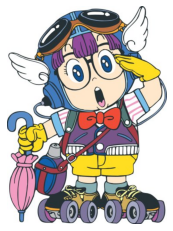

In [ ]:
import cv2
import kornia as K
import numpy as np
from matplotlib import pyplot as plt

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread("drslump.jpg", cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off");

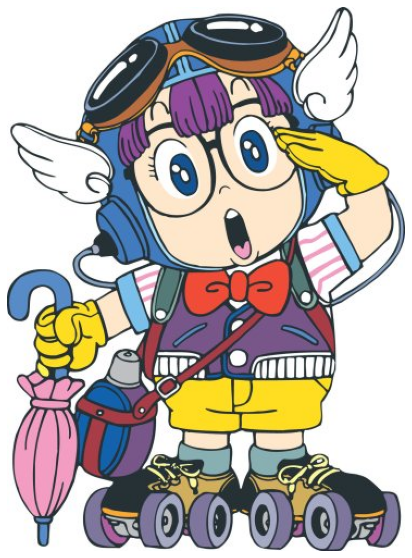

In [ ]:
import torch
import torchvision


def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = K.utils.tensor_to_image(out)
    plt.figure(figsize=(20, 10))
    plt.imshow(out_np)
    plt.axis("off")


# stack four identical images
data: torch.Tensor = K.utils.image_to_tensor(img_rgb).float() / 255.0  # 1xCxHxW
# plot
imshow(data)

## Plain resize vs Antializased resize

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


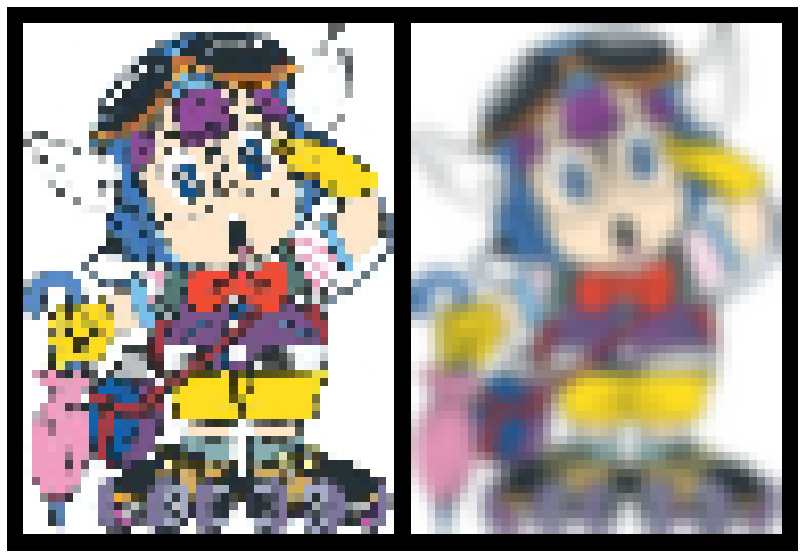

In [ ]:
x_025: torch.Tensor = K.geometry.rescale(data, (0.125, 0.125))
x_025AA: torch.Tensor = K.geometry.rescale(data, (0.125, 0.125), antialias=True)
out = torch.stack([x_025, x_025AA], dim=0)
imshow(out)